# Asthma and Pollution Exploratory Data Analysis
Ainsley Atherton, Nikki La, Jordan Ledbetter, Palaniappan Vijay Sithambaram


In [1]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Datasets

In [28]:
#Read in the data

#Asthma
folder_path = 'CDC_Asthma_Data'
asthma_prev = pd.read_csv(folder_path + '/Adult_Asthma_prev2018-2021/data_180748.csv')
asthma_hosp = pd.read_csv(folder_path + '/Asthma_Hospitalizations2000-2021/data_181454.csv')
asthma_er = pd.read_csv(folder_path + '/ER_visits_Asthma2000-2021/data_181211.csv')


In [3]:
#EPA Data (will probably want to merge these into one dataset)
AQI_folder_path = 'CDC_Asthma_Data/AQI_data'
AQI2000 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2000.csv')
AQI2001 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2001.csv')
AQI2002 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2002.csv')
AQI2003 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2003.csv')
AQI2004 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2004.csv')
AQI2005 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2005.csv')
AQI2006 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2006.csv')
AQI2007 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2007.csv')
AQI2008 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2008.csv')
AQI2009 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2009.csv')
AQI2010 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2010.csv')
AQI2011 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2011.csv')
AQI2012 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2012.csv')
AQI2013 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2013.csv')
AQI2014 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2014.csv')
AQI2015 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2015.csv')
AQI2016 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2016.csv')
AQI2017 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2017.csv')
AQI2018 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2018.csv')
AQI2019 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2019.csv')
AQI2020 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2020.csv')
AQI2021 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2021.csv')

### Asthma Prevalence

In [4]:
asthma_prev.shape
print(asthma_prev.head())

   StateFIPS    State  CountyFIPS   County  Year  Value  Data Comment  \
0          1  Alabama        1001  Autauga  2018   10.2           NaN   
1          1  Alabama        1001  Autauga  2019    9.7           NaN   
2          1  Alabama        1001  Autauga  2020    9.8           NaN   
3          1  Alabama        1001  Autauga  2021   10.2           NaN   
4          1  Alabama        1003  Baldwin  2018    9.6           NaN   

  95% Confidence Interval  Confidence Interval Low  Confidence Interval High  \
0            (9.6 - 10.8)                      9.6                      10.8   
1            (9.2 - 10.3)                      9.2                      10.3   
2            (9.4 - 10.4)                      9.4                      10.4   
3            (8.9 - 11.6)                      8.9                      11.6   
4            (9.1 - 10.2)                      9.1                      10.2   

   Unnamed: 10  
0          NaN  
1          NaN  
2          NaN  
3          N

No null values in columns we want to keep:

In [5]:
asthma_prev.rename(columns = {'Value':'Prevalence %'}, inplace = True) 
asthma_prev.isnull().sum()

StateFIPS                       0
State                           0
CountyFIPS                      0
County                          0
Year                            0
Prevalence %                    0
Data Comment                12482
95% Confidence Interval         0
Confidence Interval Low         0
Confidence Interval High        0
Unnamed: 10                 12482
dtype: int64

Removing data comment and unnamed columns as we don't need them

In [6]:
asthma_prev = asthma_prev.drop(['Data Comment'], axis=1)
asthma_prev = asthma_prev.drop(['Unnamed: 10'], axis=1)
asthma_prev = asthma_prev.drop(['95% Confidence Interval', 'Confidence Interval Low', 'Confidence Interval High'], axis=1)
asthma_prev

StateFIPS    State  CountyFIPS    County  Year  Prevalence %
0              1  Alabama        1001   Autauga  2018          10.2
1              1  Alabama        1001   Autauga  2019           9.7
2              1  Alabama        1001   Autauga  2020           9.8
3              1  Alabama        1001   Autauga  2021          10.2
4              1  Alabama        1003   Baldwin  2018           9.6
...          ...      ...         ...       ...   ...           ...
12477         56  Wyoming       56043  Washakie  2021           9.6
12478         56  Wyoming       56045    Weston  2018           9.3
12479         56  Wyoming       56045    Weston  2019           9.0
12480         56  Wyoming       56045    Weston  2020           9.8
12481         56  Wyoming       56045    Weston  2021           9.7

[12482 rows x 6 columns]

Looks good now, ready for merging

### Hospitalizations due to Asthma
- Age adjusted rate of hospitalization for asthma per 10,000

In [29]:
print(asthma_hosp.head())
df = asthma_hosp.sort_values(by = 'Year', ascending = True)
df

   StateFIPS    State  CountyFIPS  County  Year Value Data Comment  Unnamed: 7
0          4  Arizona        4001  Apache  2005   7.2          NaN         NaN
1          4  Arizona        4001  Apache  2006   4.8          NaN         NaN
2          4  Arizona        4001  Apache  2007   3.6          NaN         NaN
3          4  Arizona        4001  Apache  2008   5.1          NaN         NaN
4          4  Arizona        4001  Apache  2009   5.6          NaN         NaN


StateFIPS           State  CountyFIPS    County  Year       Value  \
20101         35      New Mexico       35013  Dona Ana  2000         6.1   
22114         37  North Carolina       37015    Bertie  2000        22.9   
22103         37  North Carolina       37013  Beaufort  2000        22.7   
3537          12         Florida       12081   Manatee  2000        11.7   
22092         37  North Carolina       37011     Avery  2000        12.1   
...          ...             ...         ...       ...   ...         ...   
20232         35      New Mexico       35023   Hidalgo  2021         0.0   
20254         35      New Mexico       35025       Lea  2021         3.2   
20276         35      New Mexico       35027   Lincoln  2021  Suppressed   
20166         35      New Mexico       35017     Grant  2021  Suppressed   
33477         55       Wisconsin       55141      Wood  2021         1.2   

      Data Comment  Unnamed: 7  
20101          NaN         NaN  
22114          NaN         NaN  
22103          NaN         NaN  
3537           NaN         NaN  
22092          NaN         NaN  
...            ...         ...  
20232          NaN         NaN  
20254          NaN         NaN  
20276     Unstable         NaN  
20166     Unstable         NaN  
33477     Unstable         NaN  

[33478 rows x 8 columns]

In [30]:
print(asthma_hosp.shape)

(33478, 8)


In [31]:
print(asthma_hosp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33478 entries, 0 to 33477
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StateFIPS     33478 non-null  int64  
 1   State         33478 non-null  object 
 2   CountyFIPS    33478 non-null  int64  
 3   County        33478 non-null  object 
 4   Year          33478 non-null  int64  
 5   Value         33478 non-null  object 
 6   Data Comment  10363 non-null  object 
 7   Unnamed: 7    0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB
None


In [32]:
# Rename Value column
asthma_hosp.rename(columns = {'Value':'Hospitalizations (rate per 10,000)'}, inplace = True) 

In [33]:
# Check for missing values
asthma_hosp.isnull().sum()

StateFIPS                                 0
State                                     0
CountyFIPS                                0
County                                    0
Year                                      0
Hospitalizations (rate per 10,000)        0
Data Comment                          23115
Unnamed: 7                            33478
dtype: int64

In [34]:
# Remove all-null columns
asthma_hosp = asthma_hosp.drop(columns = 'Unnamed: 7')

In [35]:
# Identify unique comments
asthma_hosp['Data Comment'].unique()

array([nan, 'Unstable'], dtype=object)

In [36]:
# Calculate percentage of suppressed data
is_suppressed = asthma_hosp[asthma_hosp['Hospitalizations (rate per 10,000)'] == 'Suppressed']
print('Percentage of Suppressed Data:', (len(is_suppressed) / len(asthma_hosp)) * 100)

Percentage of Suppressed Data: 15.97168289623036


In [37]:
# Calculate percentage of unstability
is_unstable = asthma_hosp[asthma_hosp['Data Comment'] == 'Unstable']
print('Percentage of Unstability:', (len(is_unstable) / len(asthma_hosp)) * 100)

Percentage of Unstability: 30.954656789533423


In [38]:
# Asthma Hospitalizations: 2000-2021
asthma_hosp['Hospitalizations (rate per 10,000)'] = asthma_hosp['Hospitalizations (rate per 10,000)'].replace('Suppressed', np.nan) #convert 'Supressed' values to NaN
asthma_hosp['Hospitalizations (rate per 10,000)'] = pd.to_numeric(asthma_hosp['Hospitalizations (rate per 10,000)']) #convert value to numeric column

In [39]:
# Descriptive Statistics
asthma_hosp['Hospitalizations (rate per 10,000)'].describe()

count    28131.000000
mean         9.761658
std          8.303374
min          0.000000
25%          4.900000
50%          8.100000
75%         12.400000
max        154.500000
Name: Hospitalizations (rate per 10,000), dtype: float64

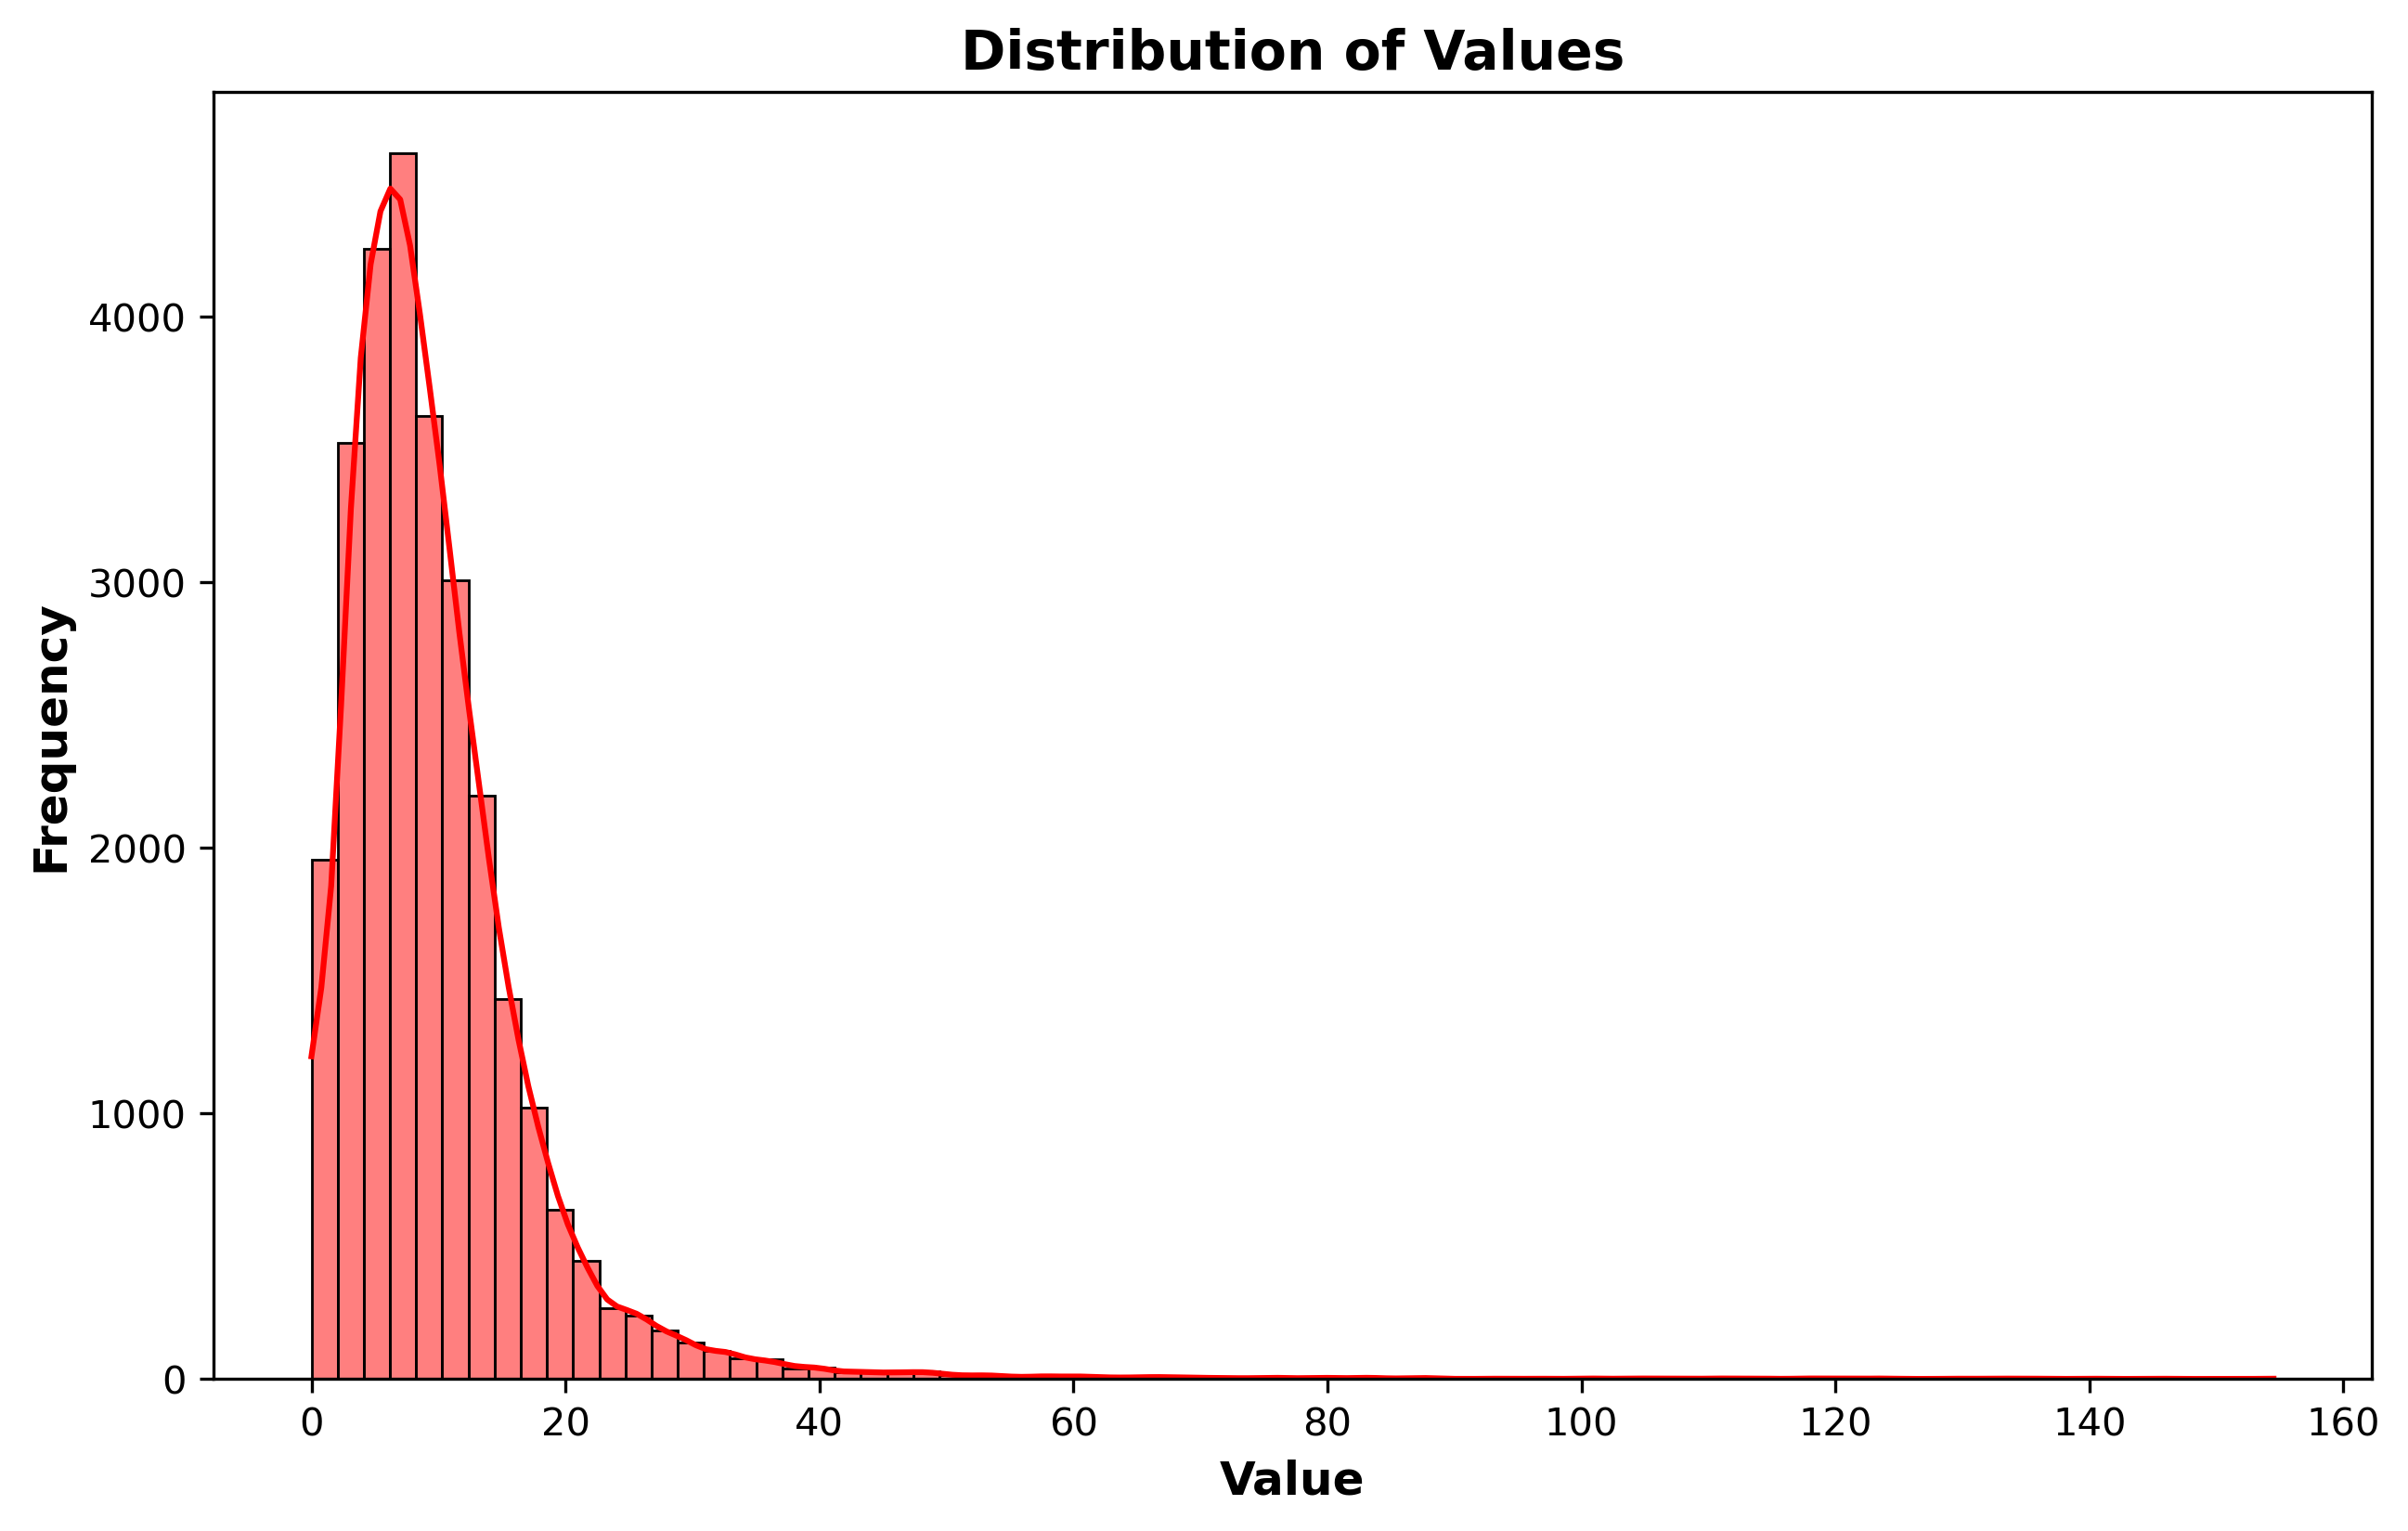

In [40]:
# Distribution of Values
plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(data=asthma_hosp, x='Hospitalizations (rate per 10,000)', bins=75, kde=True, color='red')
plt.title('Distribution of Values', fontsize=14, fontweight='bold')
plt.xlabel('Value', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.show()

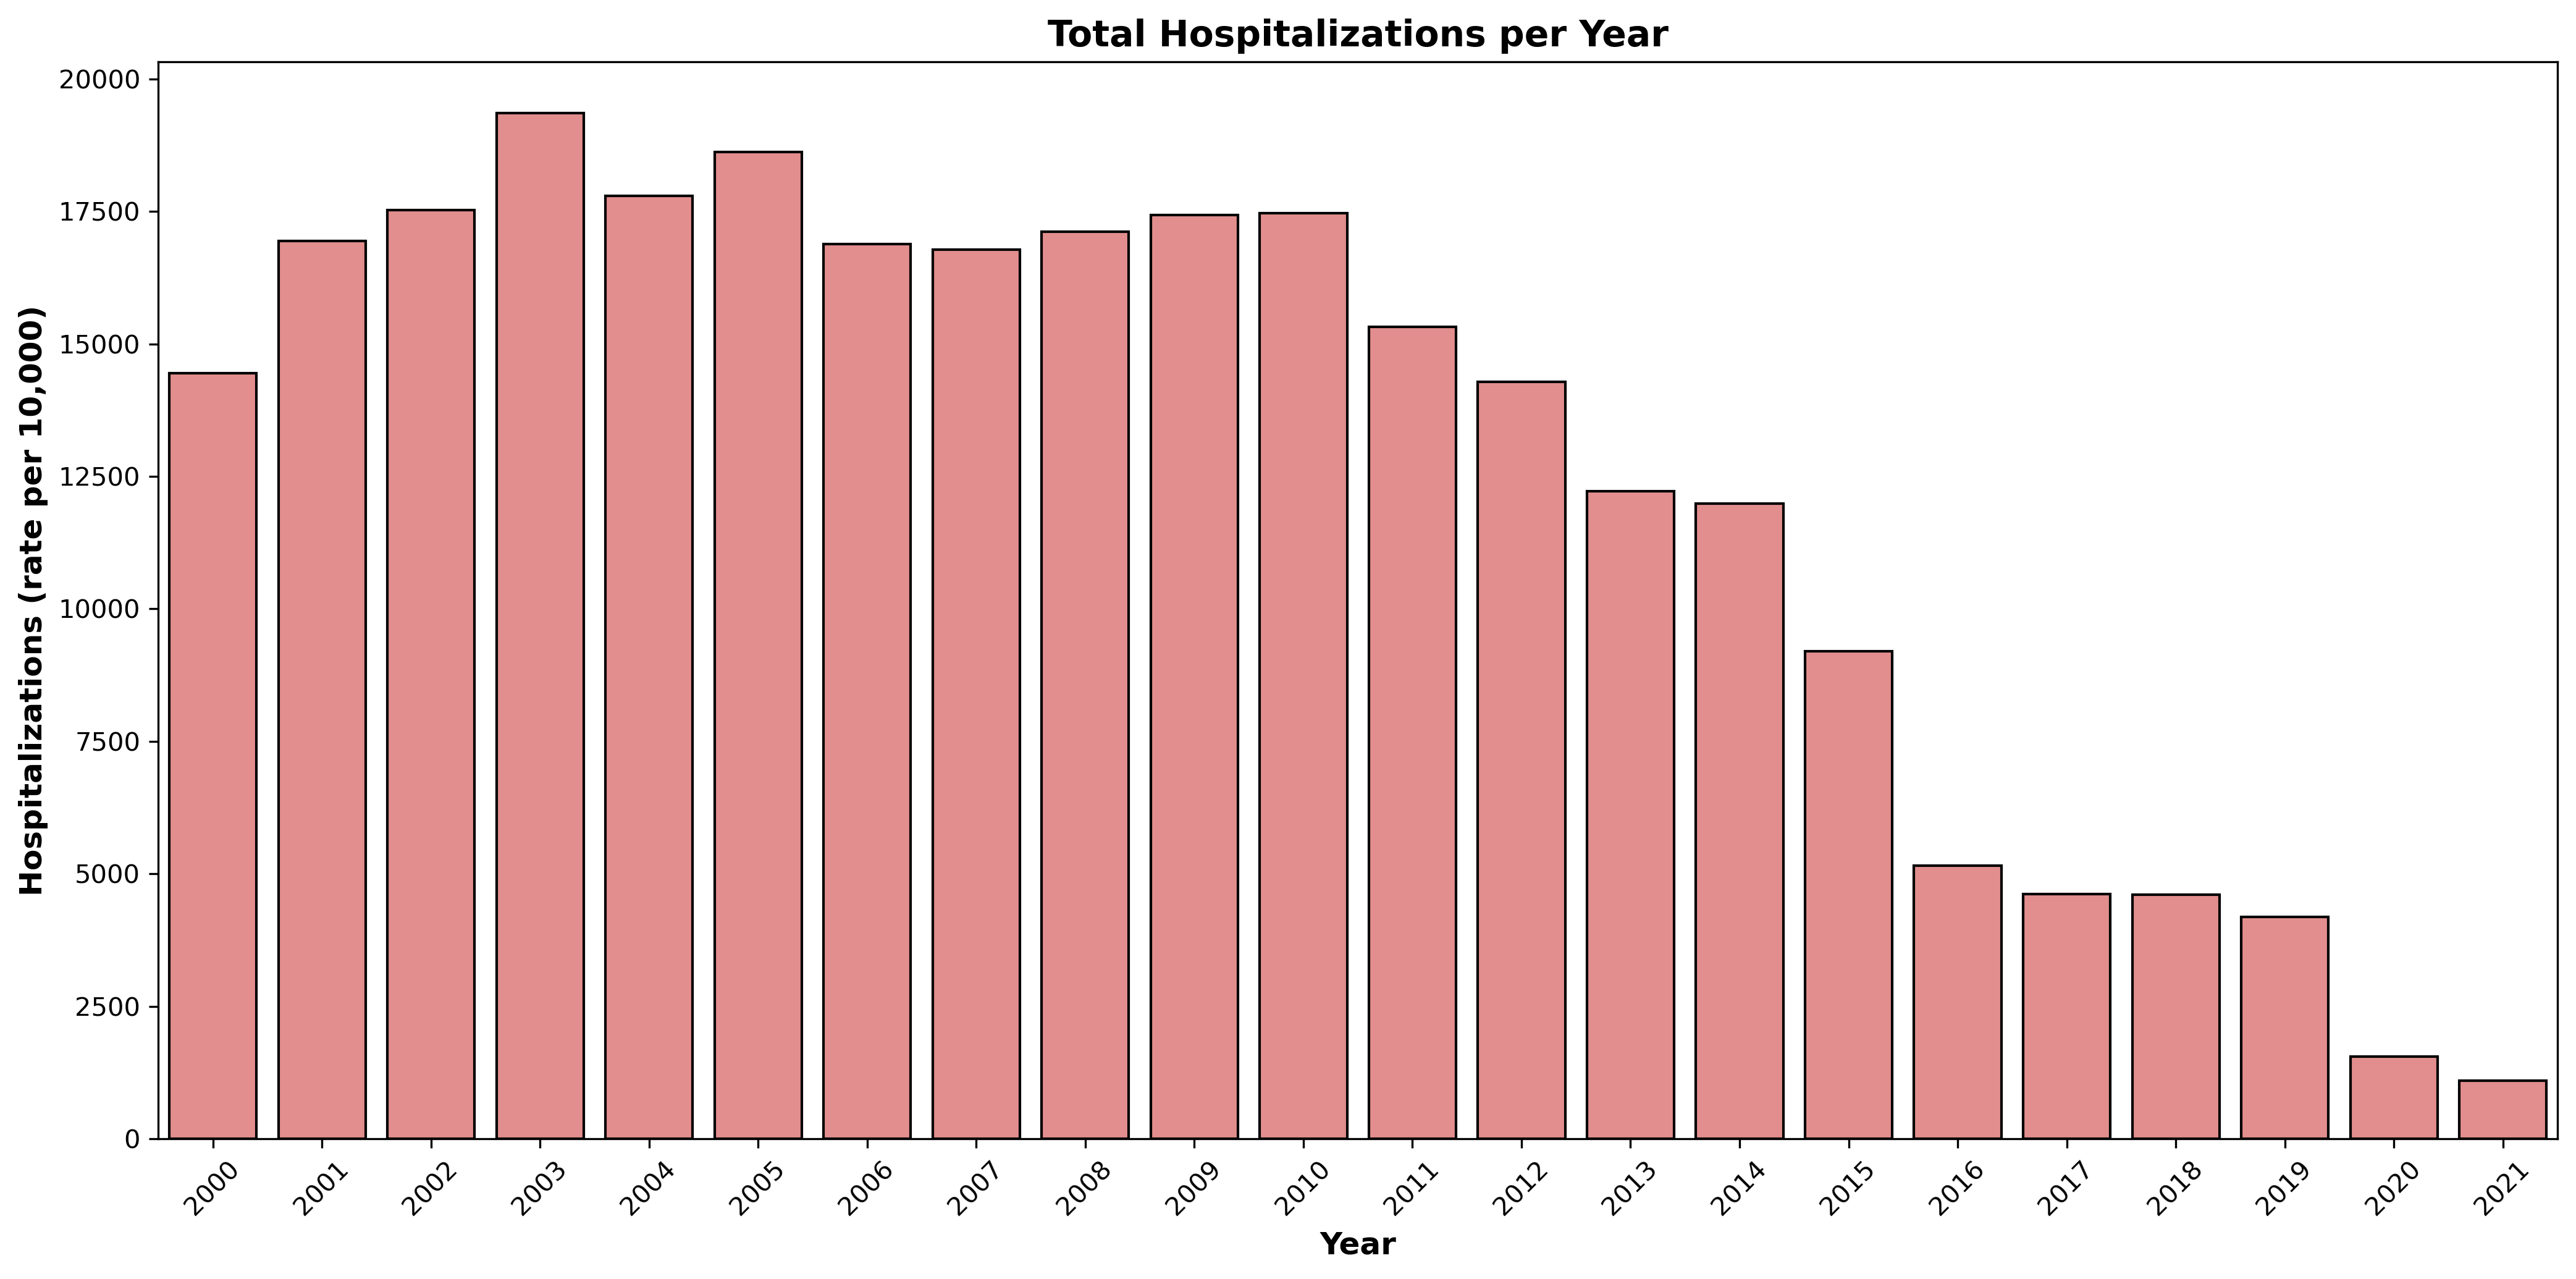

In [41]:
# Plot total number of hospitalizations due to asthma by year
hosp_values = asthma_hosp.groupby('Year')['Hospitalizations (rate per 10,000)'].sum().reset_index()

plt.figure(figsize=(14, 7), dpi=300)
sns.barplot(data=hosp_values, x='Year', y='Hospitalizations (rate per 10,000)', color='lightcoral', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Total Hospitalizations per Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Hospitalizations (rate per 10,000)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [42]:
### Load shapefiles
# Counties
url_county = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip'
county_gdf = gpd.read_file(url_county)

# States
url_county = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip'
state_gdf = gpd.read_file(url_county)

# Exclude everthing outside the contiguous US
exclude_list = [15, 72, 2, 60, 66, 69, 78]
county_gdf = county_gdf.loc[~county_gdf['STATEFP'].astype(int).isin(exclude_list)]
state_gdf = state_gdf.loc[~state_gdf['STATEFP'].astype(int).isin(exclude_list)]

# Convert to 5070
county_gdf = county_gdf.to_crs(5070) 
state_gdf = state_gdf.to_crs(5070)

# Create a FIPS code
county_gdf['FIPS'] = county_gdf.STATEFP + county_gdf.COUNTYFP

In [43]:
## Merge hospitalization data with geospatial data
# Convert county FIPS code columns to strings
asthma_hosp['CountyFIPS'] = asthma_hosp['CountyFIPS'].astype(str)

# Add leading zeros to FIPS code where needed
asthma_hosp['CountyFIPS'] = asthma_hosp['CountyFIPS'].apply(lambda x: x.zfill(5))

# Groupy values by FIPS 
grouped_hosp = asthma_hosp.groupby('CountyFIPS')['Hospitalizations (rate per 10,000)'].sum().reset_index()

# Merge the datasets on their FIPS code
merged_hosp = county_gdf.merge(grouped_hosp, left_on='FIPS', right_on='CountyFIPS', how='left')

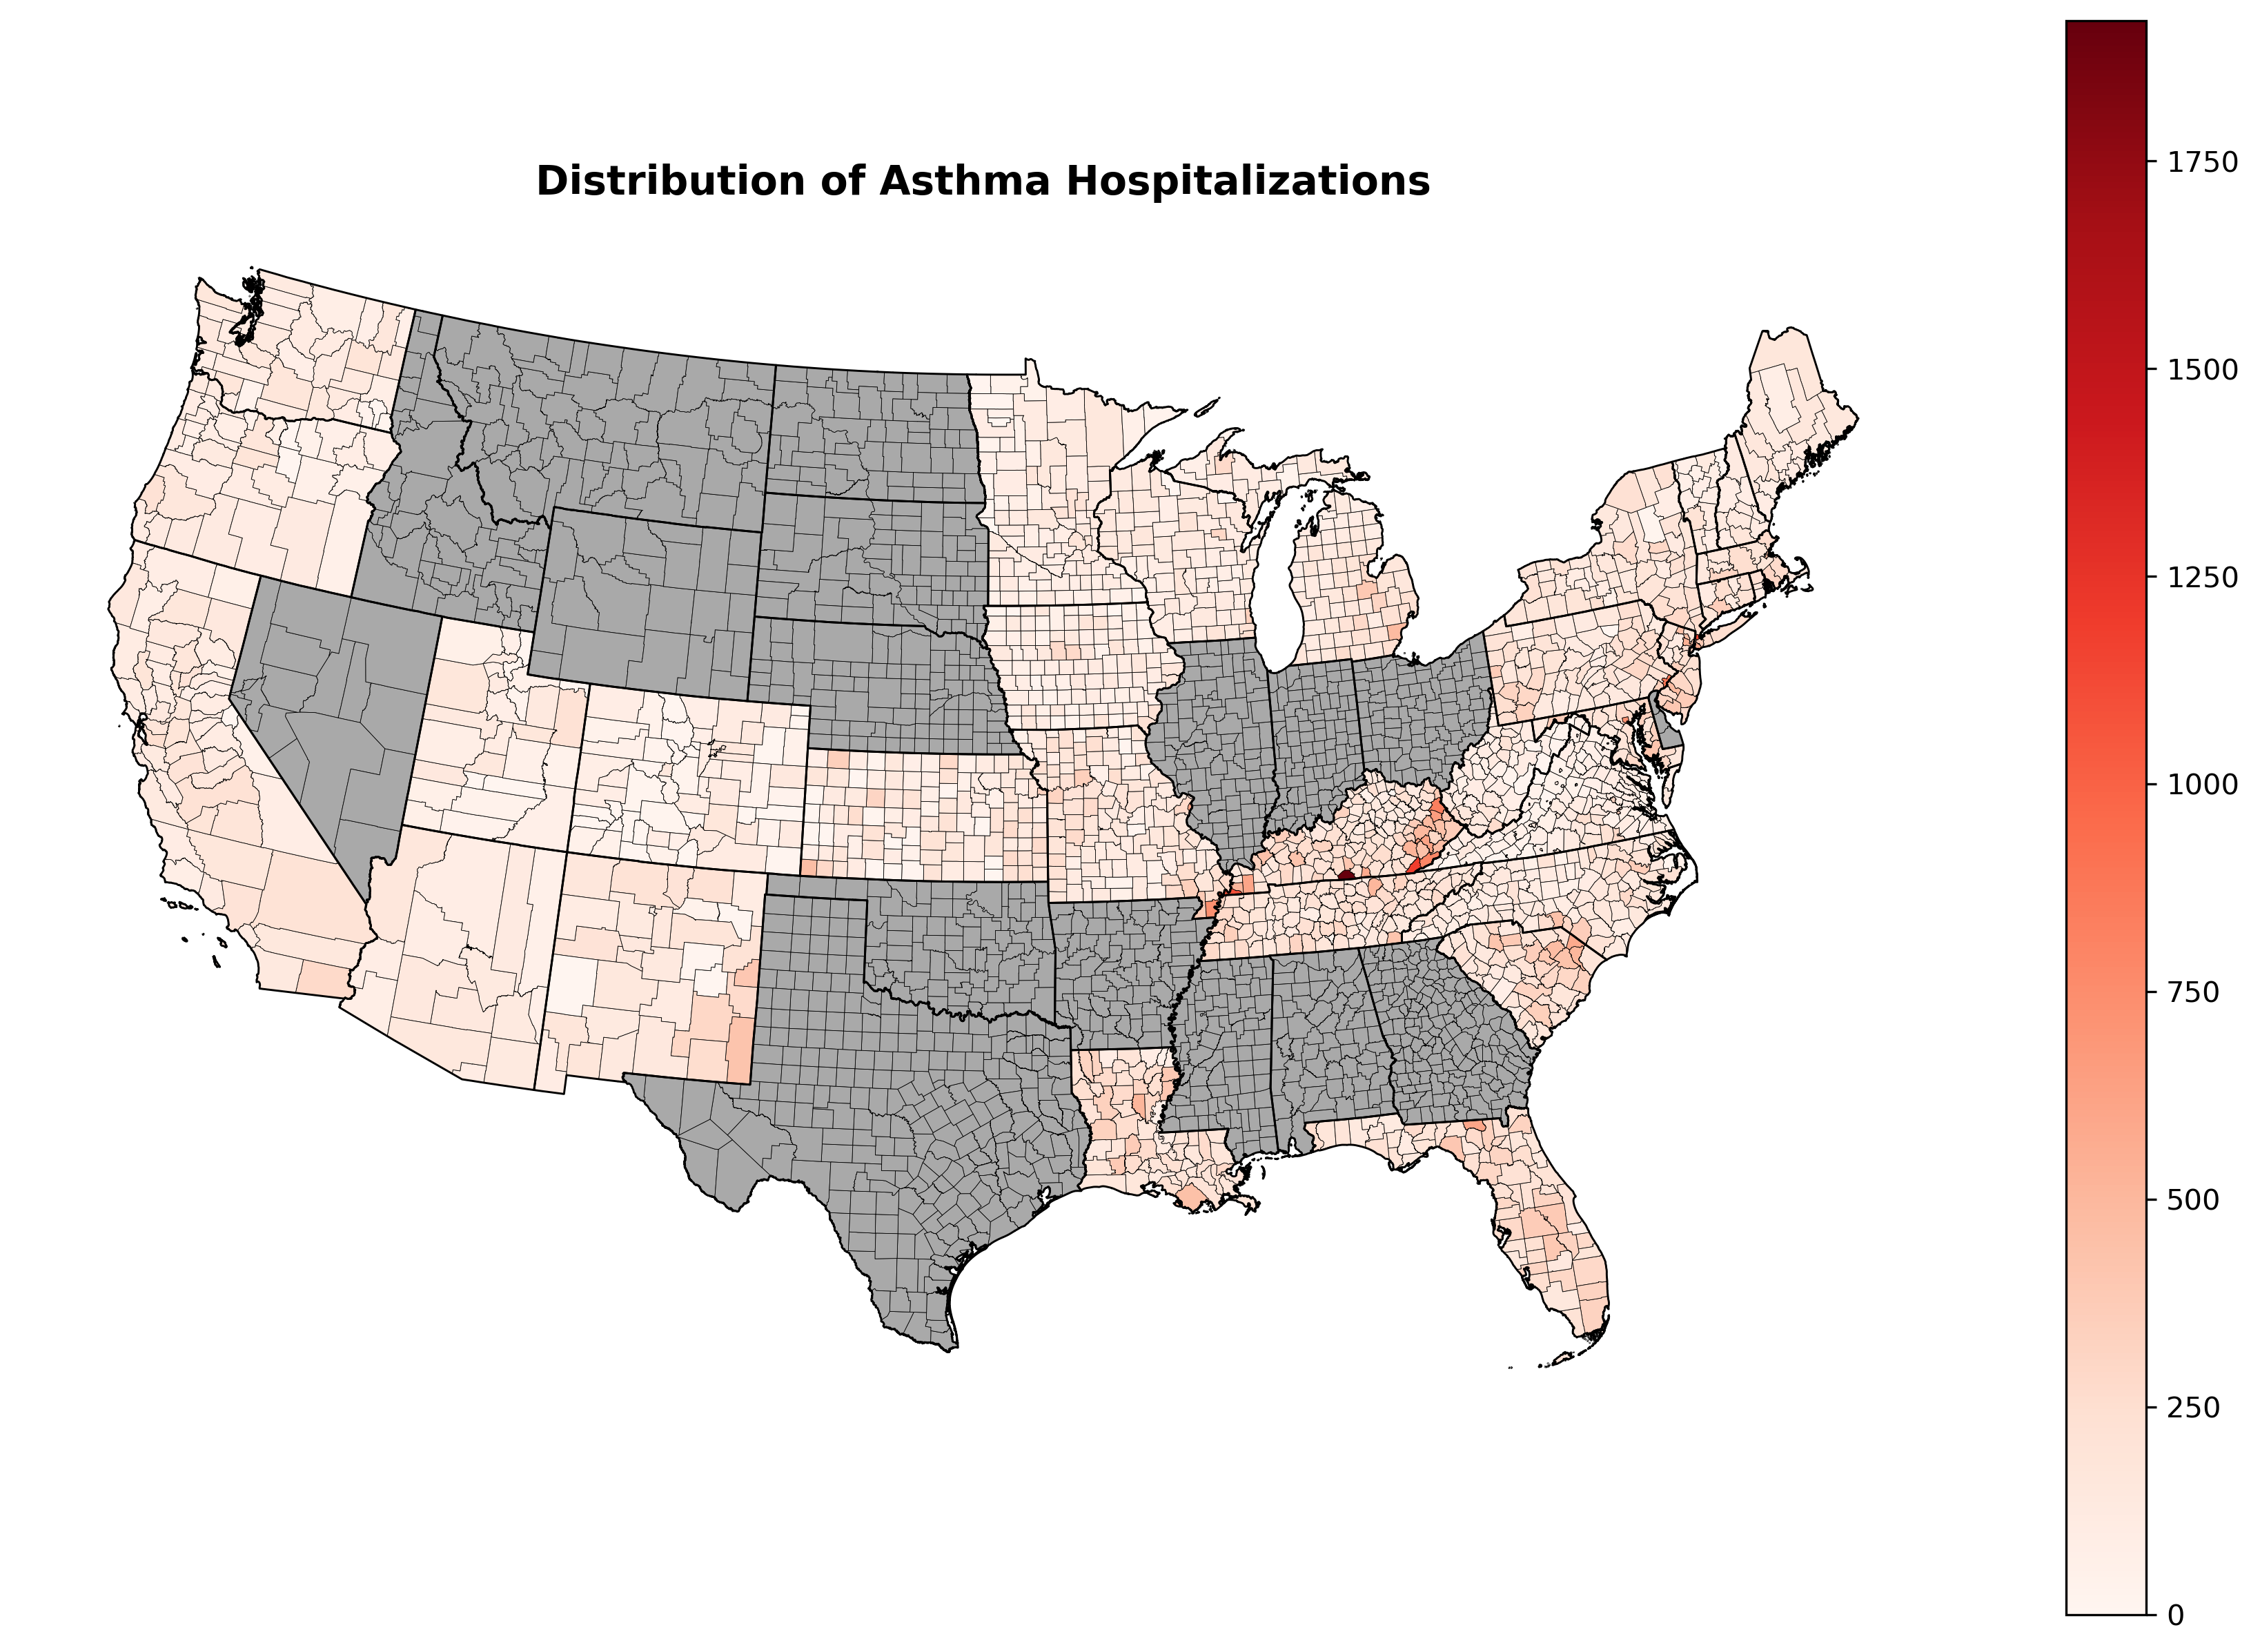

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=300)

# Choropleth Plot
merged_hosp.plot(column='Hospitalizations (rate per 10,000)', ax=ax, legend=True,
                 missing_kwds={'color': 'darkgrey'},
                 cmap='Reds', edgecolor='black', linewidth=0.2)
state_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.7)

ax.set_axis_off()
ax.set_title('Distribution of Asthma Hospitalizations', fontsize=14, fontweight='bold')
plt.show()

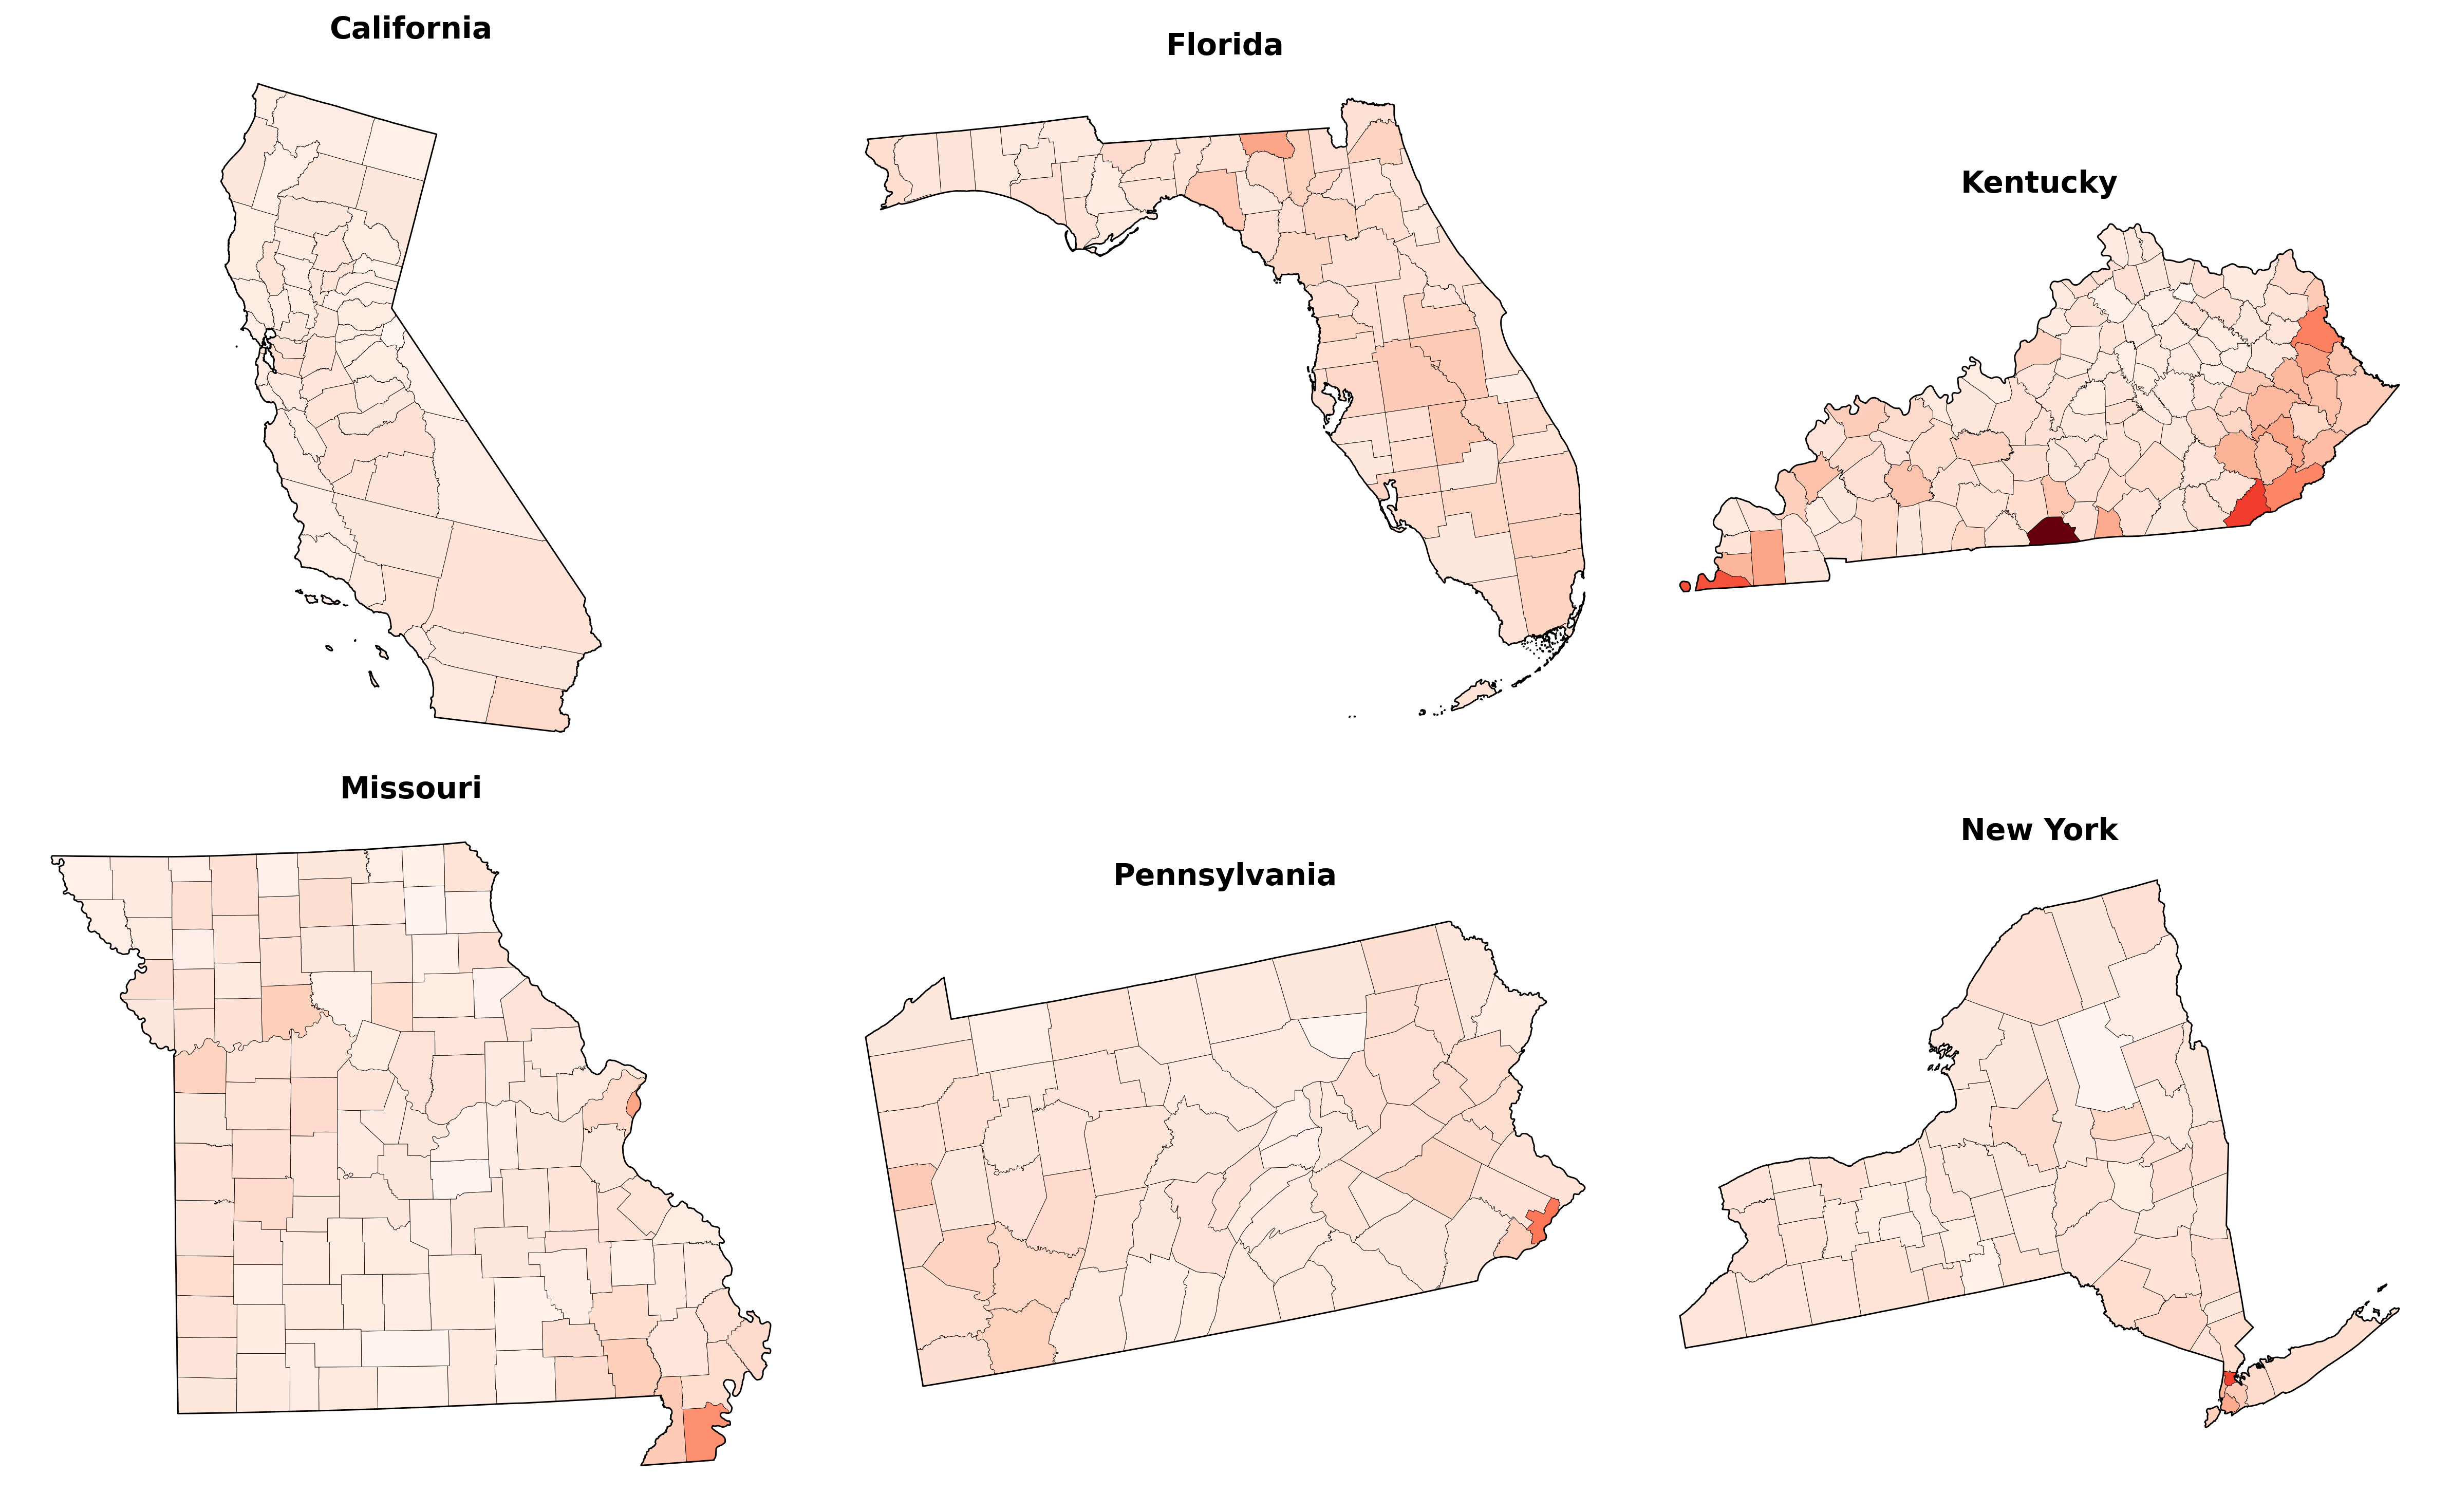

In [45]:
# Filter for state in the county data
ca_data = merged_hosp[merged_hosp['STATE_NAME'] == 'California']
fl_data = merged_hosp[merged_hosp['STATE_NAME'] == 'Florida']
kt_data = merged_hosp[merged_hosp['STATE_NAME'] == 'Kentucky']
ms_data = merged_hosp[merged_hosp['STATE_NAME'] == 'Missouri']
penn_data = merged_hosp[merged_hosp['STATE_NAME'] == 'Pennsylvania']
ny_data = merged_hosp[merged_hosp['STATE_NAME'] == 'New York']

# Filter for state in the state GDF
ca_state_boundary = state_gdf[state_gdf['NAME'] == 'California']
fl_state_boundary = state_gdf[state_gdf['NAME'] == 'Florida']
kt_state_boundary = state_gdf[state_gdf['NAME'] == 'Kentucky']
ms_state_boundary = state_gdf[state_gdf['NAME'] == 'Missouri']
penn_state_boundary = state_gdf[state_gdf['NAME'] == 'Pennsylvania']
ny_state_boundary = state_gdf[state_gdf['NAME'] == 'New York']

# Plot
fig, ax = plt.subplots(2, 3, figsize=(16, 10), dpi=300)

ca_data.plot(column='Hospitalizations (rate per 10,000)', ax=ax[0,0],
                    vmin=merged_hosp['Hospitalizations (rate per 10,000)'].min(), vmax=merged_hosp['Hospitalizations (rate per 10,000)'].max(),
                    missing_kwds={'color': 'darkgrey'},
                    cmap='Reds', edgecolor='black', linewidth=0.2)
fl_data.plot(column='Hospitalizations (rate per 10,000)', ax=ax[0,1], 
                    vmin=merged_hosp['Hospitalizations (rate per 10,000)'].min(), vmax=merged_hosp['Hospitalizations (rate per 10,000)'].max(),
                    missing_kwds={'color': 'darkgrey'},
                    cmap='Reds', edgecolor='black', linewidth=0.2)
kt_data.plot(column='Hospitalizations (rate per 10,000)', ax=ax[0,2],
                    vmin=merged_hosp['Hospitalizations (rate per 10,000)'].min(), vmax=merged_hosp['Hospitalizations (rate per 10,000)'].max(),
                    missing_kwds={'color': 'darkgrey'},
                    cmap='Reds', edgecolor='black', linewidth=0.2)
ms_data.plot(column='Hospitalizations (rate per 10,000)', ax=ax[1,0], 
                    vmin=merged_hosp['Hospitalizations (rate per 10,000)'].min(), vmax=merged_hosp['Hospitalizations (rate per 10,000)'].max(),
                    missing_kwds={'color': 'darkgrey'},
                    cmap='Reds', edgecolor='black', linewidth=0.2)
penn_data.plot(column='Hospitalizations (rate per 10,000)', ax=ax[1,1],
                    vmin=merged_hosp['Hospitalizations (rate per 10,000)'].min(), vmax=merged_hosp['Hospitalizations (rate per 10,000)'].max(),
                    missing_kwds={'color': 'darkgrey'},
                    cmap='Reds', edgecolor='black', linewidth=0.2)
ny_data.plot(column='Hospitalizations (rate per 10,000)', ax=ax[1,2], 
                    vmin=merged_hosp['Hospitalizations (rate per 10,000)'].min(), vmax=merged_hosp['Hospitalizations (rate per 10,000)'].max(),
                    missing_kwds={'color': 'darkgrey'},
                    cmap='Reds', edgecolor='black', linewidth=0.2)

# Overlay state boundary for context
ca_state_boundary.plot(ax=ax[0,0], facecolor='none', edgecolor='black', linewidth=0.7)
fl_state_boundary.plot(ax=ax[0,1], facecolor='none', edgecolor='black', linewidth=0.7)
kt_state_boundary.plot(ax=ax[0,2], facecolor='none', edgecolor='black', linewidth=0.7)
ms_state_boundary.plot(ax=ax[1,0], facecolor='none', edgecolor='black', linewidth=0.7)
penn_state_boundary.plot(ax=ax[1,1], facecolor='none', edgecolor='black', linewidth=0.7)
ny_state_boundary.plot(ax=ax[1,2], facecolor='none', edgecolor='black', linewidth=0.7)

ax[0,0].set_axis_off()
ax[0,0].set_title('California', fontsize=14, fontweight='bold')
ax[0,1].set_axis_off()
ax[0,1].set_title('Florida', fontsize=14, fontweight='bold')
ax[0,2].set_axis_off()
ax[0,2].set_title('Kentucky', fontsize=14, fontweight='bold')
ax[1,0].set_axis_off()
ax[1,0].set_title('Missouri', fontsize=14, fontweight='bold')
ax[1,1].set_axis_off()
ax[1,1].set_title('Pennsylvania', fontsize=14, fontweight='bold')
ax[1,2].set_axis_off()
ax[1,2].set_title('New York', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [46]:
# Drop Data Comment column
asthma_hosp = asthma_hosp.drop(columns='Data Comment')

### ER visits due to Asthma

In [11]:
print(asthma_er.head())

   StateFIPS    State  CountyFIPS  County  Year Value Data Comment  Unnamed: 7
0          4  Arizona        4001  Apache  2005  31.0          NaN         NaN
1          4  Arizona        4001  Apache  2006  21.1          NaN         NaN
2          4  Arizona        4001  Apache  2007  21.1          NaN         NaN
3          4  Arizona        4001  Apache  2008  20.2          NaN         NaN
4          4  Arizona        4001  Apache  2009  44.0          NaN         NaN


In [12]:
asthma_er.rename(columns = {'Value':'ER visits for Asthma (rate per 10,000)'}, inplace = True) 
asthma_er.isnull().sum()

StateFIPS                                     0
State                                         0
CountyFIPS                                    0
County                                        0
Year                                          0
ER visits for Asthma (rate per 10,000)        0
Data Comment                              20193
Unnamed: 7                                22059
dtype: int64

In [13]:
asthma_er = asthma_er.drop(['Unnamed: 7', 'Data Comment'], axis=1)

### Merging Asthma Data -->  All Asthma Dataset

In [14]:
prev_hosp_merge = asthma_hosp.merge(asthma_prev, on=['StateFIPS','State', 'CountyFIPS', 'County', 'Year'], how='outer', indicator=True)
prev_hosp_merge

StateFIPS    State  CountyFIPS    County  Year  \
0              1  Alabama        1001   Autauga  2018   
1              1  Alabama        1001   Autauga  2019   
2              1  Alabama        1001   Autauga  2020   
3              1  Alabama        1001   Autauga  2021   
4              1  Alabama        1003   Baldwin  2018   
...          ...      ...         ...       ...   ...   
41096         56  Wyoming       56043  Washakie  2021   
41097         56  Wyoming       56045    Weston  2018   
41098         56  Wyoming       56045    Weston  2019   
41099         56  Wyoming       56045    Weston  2020   
41100         56  Wyoming       56045    Weston  2021   

      Hospitalizations (rate per 10,000)  Prevalence %      _merge  
0                                    NaN          10.2  right_only  
1                                    NaN           9.7  right_only  
2                                    NaN           9.8  right_only  
3                                    NaN          10.2  right_only  
4                                    NaN           9.6  right_only  
...                                  ...           ...         ...  
41096                                NaN           9.6  right_only  
41097                                NaN           9.3  right_only  
41098                                NaN           9.0  right_only  
41099                                NaN           9.8  right_only  
41100                                NaN           9.7  right_only  

[41101 rows x 8 columns]

In [15]:
#Merging in ER visits
all_asthma = prev_hosp_merge.merge(asthma_er, on=['StateFIPS','State', 'CountyFIPS', 'County', 'Year'], how='outer')
all_asthma


StateFIPS    State  CountyFIPS    County  Year  \
0              1  Alabama        1001   Autauga  2018   
1              1  Alabama        1001   Autauga  2019   
2              1  Alabama        1001   Autauga  2020   
3              1  Alabama        1001   Autauga  2021   
4              1  Alabama        1003   Baldwin  2018   
...          ...      ...         ...       ...   ...   
41796         56  Wyoming       56043  Washakie  2021   
41797         56  Wyoming       56045    Weston  2018   
41798         56  Wyoming       56045    Weston  2019   
41799         56  Wyoming       56045    Weston  2020   
41800         56  Wyoming       56045    Weston  2021   

      Hospitalizations (rate per 10,000)  Prevalence %      _merge  \
0                                    NaN          10.2  right_only   
1                                    NaN           9.7  right_only   
2                                    NaN           9.8  right_only   
3                                    NaN          10.2  right_only   
4                                    NaN           9.6  right_only   
...                                  ...           ...         ...   
41796                                NaN           9.6  right_only   
41797                                NaN           9.3  right_only   
41798                                NaN           9.0  right_only   
41799                                NaN           9.8  right_only   
41800                                NaN           9.7  right_only   

      ER visits for Asthma (rate per 10,000)  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN  
...                                      ...  
41796                                    NaN  
41797                                    NaN  
41798                                    NaN  
41799                                    NaN  
41800                                    NaN  

[41801 rows x 9 columns]

In [16]:
all_asthma.shape

(41801, 9)

In [17]:
all_asthma['CountyFIPS'] = all_asthma['CountyFIPS'].astype(str).str.zfill(5)


In [18]:
all_asthma

StateFIPS    State CountyFIPS    County  Year  \
0              1  Alabama      01001   Autauga  2018   
1              1  Alabama      01001   Autauga  2019   
2              1  Alabama      01001   Autauga  2020   
3              1  Alabama      01001   Autauga  2021   
4              1  Alabama      01003   Baldwin  2018   
...          ...      ...        ...       ...   ...   
41796         56  Wyoming      56043  Washakie  2021   
41797         56  Wyoming      56045    Weston  2018   
41798         56  Wyoming      56045    Weston  2019   
41799         56  Wyoming      56045    Weston  2020   
41800         56  Wyoming      56045    Weston  2021   

      Hospitalizations (rate per 10,000)  Prevalence %      _merge  \
0                                    NaN          10.2  right_only   
1                                    NaN           9.7  right_only   
2                                    NaN           9.8  right_only   
3                                    NaN          10.2  right_only   
4                                    NaN           9.6  right_only   
...                                  ...           ...         ...   
41796                                NaN           9.6  right_only   
41797                                NaN           9.3  right_only   
41798                                NaN           9.0  right_only   
41799                                NaN           9.8  right_only   
41800                                NaN           9.7  right_only   

      ER visits for Asthma (rate per 10,000)  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN  
...                                      ...  
41796                                    NaN  
41797                                    NaN  
41798                                    NaN  
41799                                    NaN  
41800                                    NaN  

[41801 rows x 9 columns]

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

#Load data
url_county = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip'
url_state = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip'

#Make dataframes
county_gdf = gpd.read_file(url_county)
state_gdf = gpd.read_file(url_state)

#Exluding states outside mainland
ex_list = [15, 72, 2, 60, 66, 69, 78]
county_gdf = county_gdf.loc[~county_gdf['STATEFP'].astype(int).isin(ex_list)]
state_gdf = state_gdf.loc[~state_gdf['STATEFP'].astype(int).isin(ex_list)]

#Converting CRS
county_gdf = county_gdf.to_crs(5070)
state_gdf = state_gdf.to_crs(5070)

#Plot
fig, ax1 = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

county_gdf.plot(ax = ax1, linewidth = .5, edgecolor = 'black', facecolor = 'none')
state_gdf.plot(ax = ax1, linewidth = 1, edgecolor = 'black', facecolor = 'none')

ax1.set_axis_off()



ModuleNotFoundError: No module named 'geopandas'

In [ ]:
pip install

In [ ]:
all_asthma2018 = all_asthma[all_asthma['Year'] == 2018]

In [ ]:
county_gdf.rename(columns = {'GEOID':'CountyFIPS'}, inplace = True) 

In [ ]:
geo_pop = county_gdf.merge(all_asthma2018, on = 'CountyFIPS', how = 'left') 

In [ ]:
geo_pop

STATEFP COUNTYFP  COUNTYNS        AFFGEOID CountyFIPS       NAME  \
0         20      161  00485044  0500000US20161      20161      Riley   
1         19      159  00465268  0500000US19159      19159   Ringgold   
2         30      009  01720111  0500000US30009      30009     Carbon   
3         16      007  00395090  0500000US16007      16007  Bear Lake   
4         55      011  01581065  0500000US55011      55011    Buffalo   
...      ...      ...       ...             ...        ...        ...   
3103      53      003  01533502  0500000US53003      53003     Asotin   
3104      13      043  00342852  0500000US13043      13043    Candler   
3105      48      451  01384011  0500000US48451      48451  Tom Green   
3106      39      089  01074057  0500000US39089      39089    Licking   
3107      19      193  00465285  0500000US19193      19193   Woodbury   

              NAMELSAD STUSPS  STATE_NAME LSAD  ...     AWATER  \
0         Riley County     KS      Kansas   06  ...   32047392   
1      Ringgold County     IA        Iowa   06  ...    8723135   
2        Carbon County     MT     Montana   06  ...   35213028   
3     Bear Lake County     ID       Idaho   06  ...  191364281   
4       Buffalo County     WI   Wisconsin   06  ...   87549529   
...                ...    ...         ...  ...  ...        ...   
3103     Asotin County     WA  Washington   06  ...   11291731   
3104    Candler County     GA     Georgia   06  ...   15018189   
3105  Tom Green County     TX       Texas   06  ...   48077315   
3106    Licking County     OH        Ohio   06  ...   12761090   
3107   Woodbury County     IA        Iowa   06  ...   12793700   

                                               geometry StateFIPS       State  \
0     POLYGON ((-82124.738 1807458.230, -82132.336 1...      20.0      Kansas   
1     POLYGON ((127862.311 1979027.467, 127850.008 1...      19.0        Iowa   
2     POLYGON ((-1080043.778 2542886.554, -1071425.2...      30.0     Montana   
3     POLYGON ((-1269953.954 2279390.018, -1269561.5...      16.0       Idaho   
4     POLYGON ((310980.660 2386653.979, 311029.751 2...      55.0   Wisconsin   
...                                                 ...       ...         ...   
3103  POLYGON ((-1649096.511 2757565.423, -1644531.2...      53.0  Washington   
3104  POLYGON ((1282504.903 1123868.469, 1282643.946...      13.0     Georgia   
3105  POLYGON ((-497863.947 956184.834, -496234.612 ...      48.0       Texas   
3106  POLYGON ((1115778.594 1958759.194, 1115689.498...      39.0        Ohio   
3107  POLYGON ((-40702.990 2173757.032, -37607.588 2...      19.0        Iowa   

         County    Year  Hospitalizations (rate per 10,000) Prevalence %  \
0         Riley  2018.0                          Suppressed          9.8   
1      Ringgold  2018.0                                 0.0          8.8   
2        Carbon  2018.0                                 NaN          9.1   
3     Bear Lake  2018.0                                 NaN          9.6   
4       Buffalo  2018.0                          Suppressed          9.3   
...         ...     ...                                 ...          ...   
3103     Asotin  2018.0                          Suppressed         10.8   
3104    Candler  2018.0                                 NaN         10.8   
3105  Tom Green  2018.0                                 NaN          8.7   
3106    Licking  2018.0                                 NaN          9.5   
3107   Woodbury  2018.0                                 2.1          8.8   

          _merge ER visits for Asthma (rate per 10,000)  
0           both                                    1.5  
1           both                                   28.8  
2     right_only                                    NaN  
3     right_only                                    NaN  
4           both                                   16.7  
...          ...                                    ...  
3103        both                           

<Axes: >

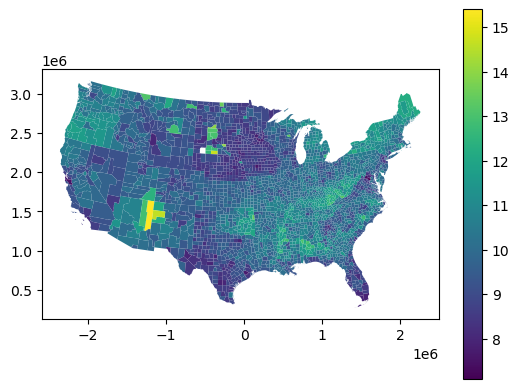

In [ ]:
geo_pop.plot(column = 'Prevalence %', cmap = 'viridis', legend = True)

In [ ]:
gdf = pd.merge(all_asthma, county_gdf)
gdf

NameError: name 'pd' is not defined

In [ ]:
all_asthma2018 = gdf[all_asthma['Year'] == 2018]
all_asthma2018

### Air Quality

In [ ]:
# Merge AQI data from 2000 - 2019
all_aqi_data = pd.concat([AQI2000, AQI2001, AQI2002, AQI2003, AQI2004, AQI2005, AQI2006, AQI2007, AQI2008, AQI2009, AQI2010,
                          AQI2011, AQI2012, AQI2013, AQI2014, AQI2015, AQI2016, AQI2017, AQI2018, AQI2019], ignore_index=True)

In [ ]:
# Find NaN values
nan_values = all_aqi_data.isna().sum()
print(nan_values)
print(all_aqi_data.shape)

In [ ]:
all_aqi_data
all_aqi_data = all_aqi_data.sort_values(by = ['County', 'Year'], ascending = True)
all_aqi_data

In [ ]:
nan_values = all_aqi_data.isna().sum()
print(nan_values)
